In [4]:
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
df = pd.read_csv("1632300362534233.csv")
df.head()


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [10]:
df = df.dropna()


In [11]:
df.count()


Area          3456
Room          3456
Parking       3456
Warehouse     3456
Elevator      3456
Address       3456
Price         3456
Price(USD)    3456
dtype: int64

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   object 
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   float64
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 172.1+ KB


In [13]:
df['Area'] = df['Area'].str.replace(',', '')


In [14]:
df = df.astype({'Area': 'int64'})


In [15]:
df['Area']


0        63
1        60
2        79
3        95
4       123
       ... 
3474     86
3475     83
3476     75
3477    105
3478     82
Name: Area, Length: 3456, dtype: int64

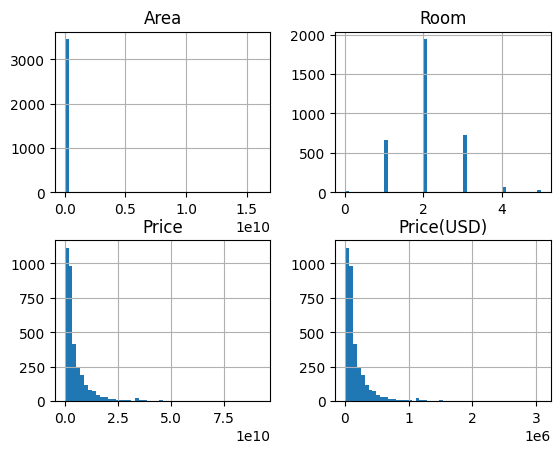

In [16]:
hist = df.hist(bins = 50)


In [17]:
for i in df.index:
    if df.loc[i, 'Area'] > 199:
        df.drop(i, inplace=True)
df['Area'].value_counts()


Area
75     111
100    103
90      95
60      94
105     92
      ... 
152      1
174      1
172      1
33       1
30       1
Name: count, Length: 158, dtype: int64

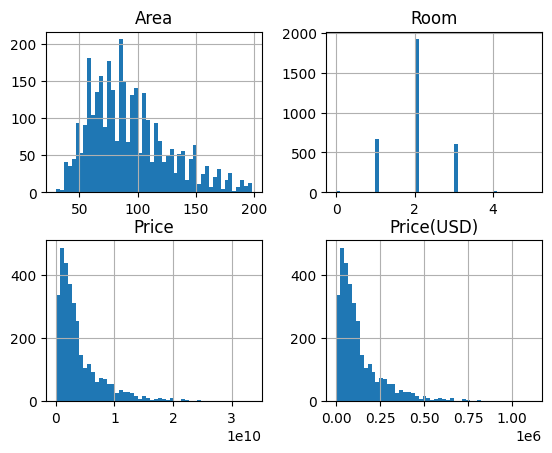

In [18]:
hist = df.hist(bins = 50)


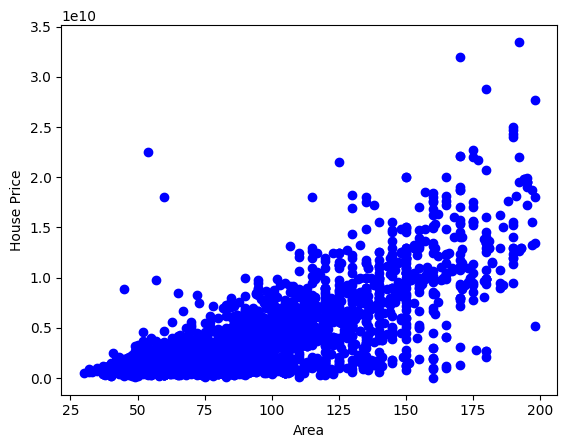

In [20]:
plt.scatter(df.Area, df.Price, color = 'blue')
plt.xlabel("Area")
plt.ylabel("House Price")
plt.show()


In [21]:
msk = np.random.rand(len(df)) < 0.6
train = df[msk]
test = df[~msk]


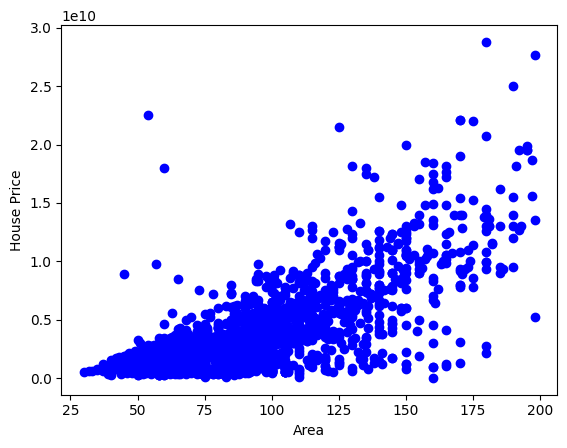

In [22]:
plt.scatter(train.Area, train.Price, color = 'blue')
plt.xlabel("Area")
plt.ylabel("House Price")
plt.show()


In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['Price']])

test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['Price']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly


array([[1.0000e+00, 6.3000e+01, 3.9690e+03],
       [1.0000e+00, 1.2300e+02, 1.5129e+04],
       [1.0000e+00, 8.7000e+01, 7.5690e+03],
       ...,
       [1.0000e+00, 6.3000e+01, 3.9690e+03],
       [1.0000e+00, 8.6000e+01, 7.3960e+03],
       [1.0000e+00, 1.0500e+02, 1.1025e+04]])

In [24]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)


Coefficients:  [[        0.         -29167294.35809064    522869.74594551]]
Intercept:  [1.49353157e+09]


Text(0, 0.5, 'HousePrice')

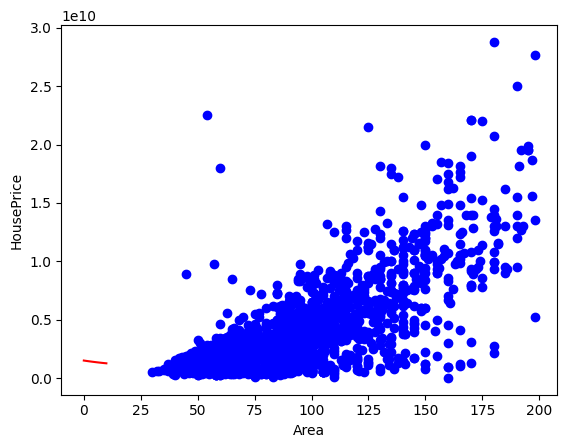

In [25]:
plt.scatter(train.Area, train.Price,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Area")
plt.ylabel("HousePrice")


In [26]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )


Mean absolute error: 1698955684.71
Residual sum of squares (MSE): 6439829848052578304.00
R2-score: 0.62


In [27]:
for i in df.index:
    if df.loc[i, 'Price'] > 999000000:
        df.drop(i, inplace=True)
df['Price'].value_counts()


Price
550000000.0    19
650000000.0    18
750000000.0    18
500000000.0    17
850000000.0    16
               ..
865000000.0     1
246000000.0     1
313000000.0     1
325000000.0     1
595000000.0     1
Name: count, Length: 176, dtype: int64

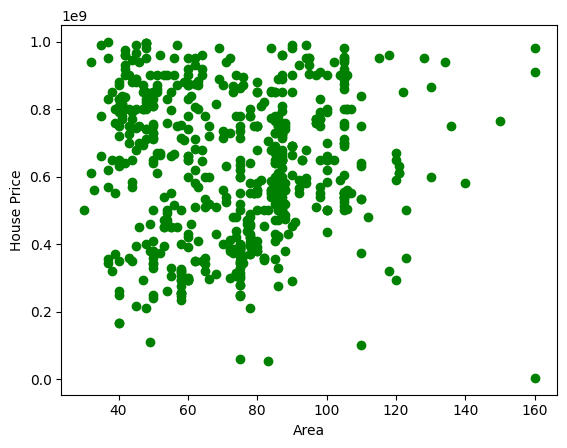

In [28]:
plt.scatter(df.Area, df.Price, color = 'green')
plt.xlabel("Area")
plt.ylabel("House Price")
plt.show()


In [29]:
msk = np.random.rand(len(df)) < 0.6
train = df[msk]
test = df[~msk]


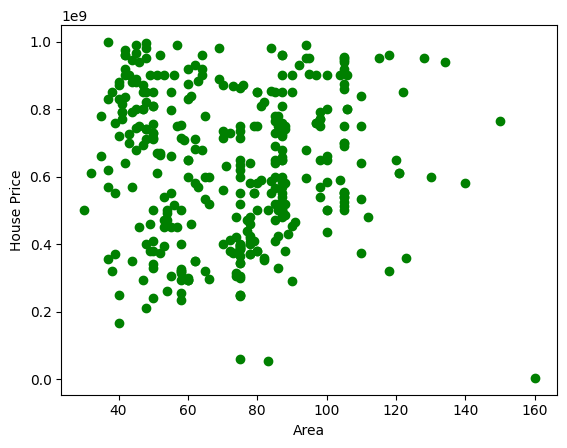

In [30]:
plt.scatter(train.Area, train.Price, color = 'green')
plt.xlabel("Area")
plt.ylabel("House Price")
plt.show()


In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['Price']])

test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['Price']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly


array([[1.000e+00, 9.500e+01, 9.025e+03],
       [1.000e+00, 8.700e+01, 7.569e+03],
       [1.000e+00, 5.400e+01, 2.916e+03],
       ...,
       [1.000e+00, 5.800e+01, 3.364e+03],
       [1.000e+00, 9.400e+01, 8.836e+03],
       [1.000e+00, 6.100e+01, 3.721e+03]])

In [32]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)


Coefficients:  [[       0.         -5863258.84013749    36428.24003803]]
Intercept:  [8.42129116e+08]


Text(0, 0.5, 'HousePrice')

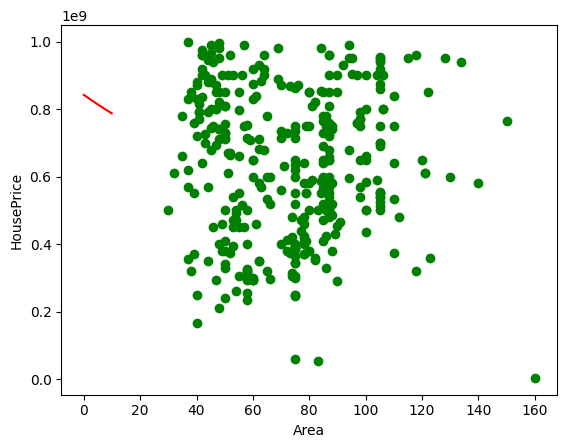

In [33]:
plt.scatter(train.Area, train.Price,  color='green')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Area")
plt.ylabel("HousePrice")


In [34]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )


Mean absolute error: 174733853.05
Residual sum of squares (MSE): 43291031771718656.00
R2-score: 0.03


In [35]:
cdf = df[['Area','Room','Address', 'Price']]
cdf.head()


,Area,Room,Address,Price
2,79,2,Pardis,550000000.0
3,95,2,Shahrake Qods,902500000.0
6,87,2,Pardis,600000000.0
8,54,2,Andisheh,493000000.0
15,63,1,Islamshahr,570000000.0


In [36]:
df.count()


Area          602
Room          602
Parking       602
Warehouse     602
Elevator      602
Address       602
Price         602
Price(USD)    602
dtype: int64

In [37]:
df['Address']


2              Pardis
3       Shahrake Qods
6              Pardis
8            Andisheh
15         Islamshahr
            ...      
3460           Parand
3464         Damavand
3466         Andisheh
3476           Parand
3478           Parand
Name: Address, Length: 602, dtype: object

In [38]:
df['Area'].dtype


dtype('int64')

In [40]:
df2 = df.dropna()
print(df2.to_string())


      Area  Room  Parking  Warehouse  Elevator                    Address        Price  Price(USD)
2       79     2     True       True      True                     Pardis  550000000.0    18333.33
3       95     2     True       True      True              Shahrake Qods  902500000.0    30083.33
6       87     2     True       True      True                     Pardis  600000000.0    20000.00
8       54     2     True       True     False                   Andisheh  493000000.0    16433.33
15      63     1    False       True     False                 Islamshahr  570000000.0    19000.00
28     110     2     True       True      True         Southern Janatabad  630000000.0    21000.00
50      98     2     True       True      True                     Pardis  540000000.0    18000.00
53      75     2    False      False     False                     Parand  635000000.0    21166.67
70      90     1    False       True     False        Pakdasht KhatunAbad  850000000.0    28333.33
73      88

In [42]:
print(df2.to_string())


      Area  Room  Parking  Warehouse  Elevator                    Address        Price  Price(USD)
2       79     2     True       True      True                     Pardis  550000000.0    18333.33
3       95     2     True       True      True              Shahrake Qods  902500000.0    30083.33
6       87     2     True       True      True                     Pardis  600000000.0    20000.00
8       54     2     True       True     False                   Andisheh  493000000.0    16433.33
15      63     1    False       True     False                 Islamshahr  570000000.0    19000.00
28     110     2     True       True      True         Southern Janatabad  630000000.0    21000.00
50      98     2     True       True      True                     Pardis  540000000.0    18000.00
53      75     2    False      False     False                     Parand  635000000.0    21166.67
70      90     1    False       True     False        Pakdasht KhatunAbad  850000000.0    28333.33
73      88

In [43]:
df2['Area'].astype(int)


2       79
3       95
6       87
8       54
15      63
        ..
3460    58
3464    94
3466    61
3476    75
3478    82
Name: Area, Length: 602, dtype: int64

In [44]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 602 entries, 2 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        602 non-null    int64  
 1   Room        602 non-null    int64  
 2   Parking     602 non-null    bool   
 3   Warehouse   602 non-null    bool   
 4   Elevator    602 non-null    bool   
 5   Address     602 non-null    object 
 6   Price       602 non-null    float64
 7   Price(USD)  602 non-null    float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 46.1+ KB


In [45]:
df2['Area'] = df2['Area'].astype('int64')


In [46]:
df2 = df2.rename({'Price': 'Rial', 'Price(USD)': 'Dollar'}, axis=1)
df2


,Area,Room,Parking,Warehouse,Elevator,Address,Rial,Dollar
2,79,2,True,True,True,Pardis,550000000.0,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000.0,30083.33
6,87,2,True,True,True,Pardis,600000000.0,20000.00
8,54,2,True,True,False,Andisheh,493000000.0,16433.33
15,63,1,False,True,False,Islamshahr,570000000.0,19000.00
...,...,...,...,...,...,...,...,...
3460,58,1,False,False,True,Parand,325000000.0,10833.33
3464,94,2,False,True,True,Damavand,595000000.0,19833.33
3466,61,2,False,True,False,Andisheh,460000000.0,15333.33
3476,75,2,False,False,False,Parand,365000000.0,12166.67


In [47]:
cdf = df2[['Area', 'Room', 'Rial', 'Dollar']]
cdf.head(10)


,Area,Room,Rial,Dollar
2,79,2,550000000.0,18333.33
3,95,2,902500000.0,30083.33
6,87,2,600000000.0,20000.00
8,54,2,493000000.0,16433.33
15,63,1,570000000.0,19000.00
28,110,2,630000000.0,21000.00
50,98,2,540000000.0,18000.00
53,75,2,635000000.0,21166.67
70,90,1,850000000.0,28333.33
73,88,3,560000000.0,18666.67


In [ ]:
df2['Area']=df2['Area'].str.replace(',','')


In [ ]:
df['Area'] = df['Area'].str.replace(',', '')
print(df)
